In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from IPython.core.display import HTML
css=open('style-table.css').read()+open('style-notebook.css').read() 
HTML('<style>()</style>.format(css)')

In [2]:
titles = pd.read_csv('titles.csv',index_col=None) 
titles.head()

,title,year
0,Tasveer Mere Sanam,1996
1,Only You,1994
2,El pueblo del terror,1970
3,Machine,2007
4,MARy,2008


In [3]:
cast = pd.read_csv('cast.csv',index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [4]:
cast['decade'] = (cast['year'] // 10) * 10
cast['role_type'] = cast['type'].apply(lambda x: 'actor' if x == 'actor' else 'actress')

# Using groupby(), plot the number of films that have been released each decade in the history of cinema 


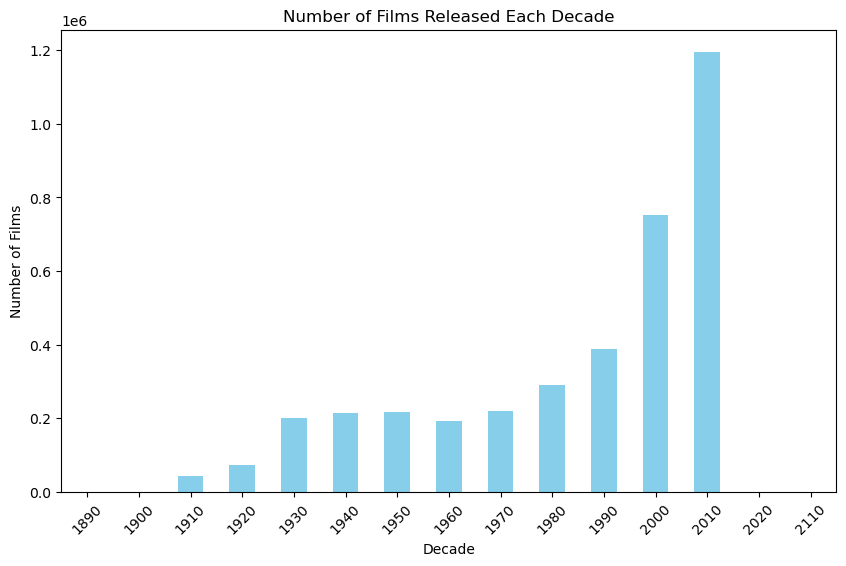

In [5]:
films_per_decade = cast.groupby('decade').size()
plt.figure(figsize=(10, 6))
films_per_decade.plot(kind='bar', color='skyblue')
plt.title('Number of Films Released Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Films')
plt.xticks(rotation=45)
plt.show()

# Use groupby() to plot the number of "Hamlet" films made each decade.


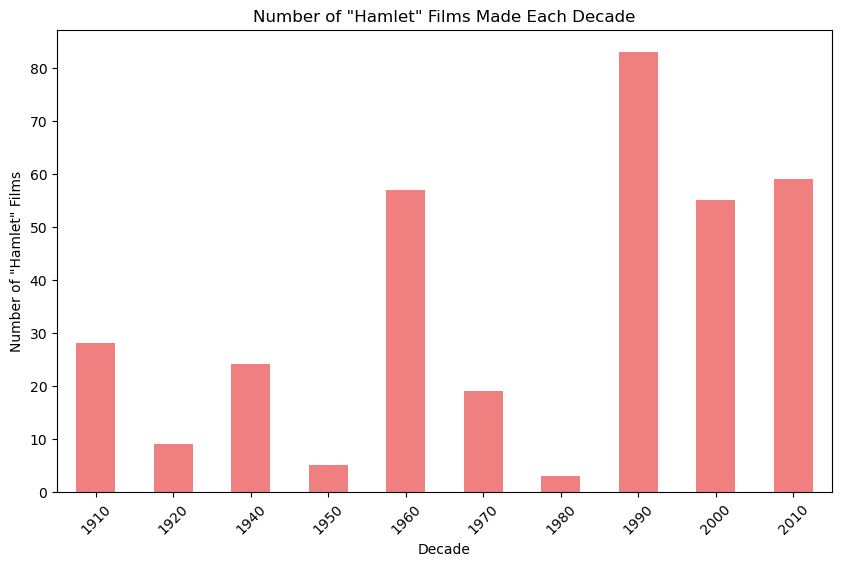

In [6]:
hamlet_films_per_decade = cast[cast['title'] == 'Hamlet'].groupby('decade').size()
plt.figure(figsize=(10, 6))
hamlet_films_per_decade.plot(kind='bar', color='lightcoral')
plt.title('Number of "Hamlet" Films Made Each Decade')
plt.xlabel('Decade')
plt.ylabel('Number of "Hamlet" Films')
plt.xticks(rotation=45)
plt.show()


# How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?


<Figure size 1200x600 with 0 Axes>

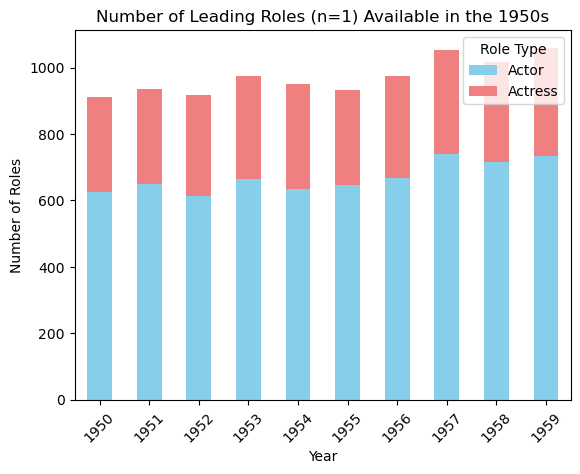

In [7]:
leading_roles_by_year = cast[cast['n'] == 1].groupby(['year', 'role_type']).size()
total_roles_by_n = cast.groupby(['year', 'role_type', 'n']).size()
roles_1950s = cast[cast['decade'] == 1950]
leading_roles_1950s = roles_1950s[roles_1950s['n'] == 1].groupby(['year', 'role_type']).size()
plt.figure(figsize=(12, 6))
leading_roles_1950s.unstack().plot(kind='bar', stacked=True, color=['skyblue', 'lightcoral'])
plt.title('Number of Leading Roles (n=1) Available in the 1950s')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.xticks(rotation=45)
plt.legend(title='Role Type', labels=['Actor', 'Actress'])
plt.show()

# In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 57

In [8]:
roles_1950s = cast[(cast['year'] // 10 == 1950)]
total_roles_by_n_1950s = roles_1950s.groupby(['type', 'n']).size().unstack()
total_roles_by_n_1950s = total_roles_by_n_1950s.fillna(0)
print("Total roles available to actors and actresses in the 1950s for each 'n' number (1-57):")
print(total_roles_by_n_1950s)

Total roles available to actors and actresses in the 1950s for each 'n' number (1-57):
Empty DataFrame
Columns: []
Index: []


# Use groupby() to determine how many roles are listed for each of the Pink Panther movies.


In [9]:
pink_panther_cast = cast[cast['title'].str.contains('Pink Panther')]
roles_per_pink_panther_movie = pink_panther_cast.groupby('title').size()
print("Number of roles listed for each Pink Panther movie:")
print(roles_per_pink_panther_movie)

Number of roles listed for each Pink Panther movie:
title
Curse of the Pink Panther          67
Revenge of the Pink Panther        68
Son of the Pink Panther            46
The Pink Panther                  111
The Pink Panther 2                 84
The Pink Panther Strikes Again     70
The Return of the Pink Panther     30
Trail of the Pink Panther          41
dtype: int64


# List, in order by year, each of the films in which Frank Oz has played more than 1 role.


In [10]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']
roles_per_film = frank_oz_roles.groupby('title').size()
films_with_multiple_roles = roles_per_film[roles_per_film > 1].index
films_with_multiple_roles = cast[cast['title'].isin(films_with_multiple_roles)].sort_values('year')
print("Films in which Frank Oz has played more than one role:")
print(films_with_multiple_roles[['year', 'title']].drop_duplicates())

Films in which Frank Oz has played more than one role:
         year                                 title
1723652  1979                      The Muppet Movie
2770981  1981        An American Werewolf in London
1048195  1981                The Great Muppet Caper
2162791  1982                      The Dark Crystal
2990396  1984            The Muppets Take Manhattan
338733   1985                      Follow That Bird
2438041  1992            The Muppet Christmas Carol
3659013  1996                Muppet Treasure Island
1002088  1999                    Muppets from Space
844765   1999  The Adventures of Elmo in Grouchland


# List each of the characters that Frank Oz has portrayed at least

In [11]:
frank_oz_roles = cast[cast['name'] == 'Frank Oz']
characters_played_by_frank_oz = frank_oz_roles['character'].value_counts()
characters_played_at_least_once = characters_played_by_frank_oz[characters_played_by_frank_oz >= 1]
print("Characters portrayed by Frank Oz at least once:")
print(characters_played_at_least_once)

Characters portrayed by Frank Oz at least once:
Miss Piggy                                              6
Yoda                                                    6
Animal                                                  6
Cookie Monster                                          5
Sam the Eagle                                           5
Fozzie Bear                                             4
Bert                                                    3
Grover                                                  2
Marvin Suggs                                            1
George the Janitor                                      1
Horse and Carriage Driver                               1
Vegetable Salesman                                      1
Doc Hopper's Men                                        1
Mr. Collins                                             1
Fozzie Bear as Fozziewig                                1
Swedish Chef (assistant)                                1
Motorcycle Guy          